### Web Scraping for Patent Claims Extraction

In [1]:
# Importing the required libraries.

import requests
import bs4
import pandas as pd

In [2]:
# Rolls-Royce Microgrid Patents.

patents = ['US8497599B2', 'US9882513B2', 'US8842401B2', 'US10591517B2', 'US10654578B2']

In [3]:
# Generating the patent URLs.

text= ""
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    print(url)

https://patents.google.com/patent/US8497599B2
https://patents.google.com/patent/US9882513B2
https://patents.google.com/patent/US8842401B2
https://patents.google.com/patent/US10591517B2
https://patents.google.com/patent/US10654578B2


In [4]:
# Web Scraping to obtain HTML tag class claims for each URL.

text= ""
claims = []
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    request_result = requests.get( url )
    soup = bs4.BeautifulSoup(request_result.text, "html.parser")
    temp = soup.find( "div" , class_='claims' ).text
    claims.append(temp)
    print(temp)


The invention claimed is:
 
1. An electrical generator network comprising a plurality of electrical generators and a plurality of local electrical systems, each local electrical system having an electrical generator, at least one of the local electrical systems having a controller to avoid the non-detection zone of loss-of-mains relays, the controller being arranged to monitor the real power flow from the electrical generator network to the at least one of the local electrical systems, the controller being arranged to determine if the absolute value of the real power flow from the electrical generator network to the at least one of the local electrical systems is below a first predetermined value to determine if there is a close match between the power requirements of the at least one of the local electrical system and the respective electrical generator, if the controller determines that the absolute value of the real power flow from the electrical generator network to the at least o


What is claimed is:
 
1. An electric propulsion system comprising:
an AC drive circuit that includes:
a plurality of propulsor motors;
an AC power bus; and
an AC generator that delivers AC electrical power to the AC power bus for simultaneously driving the plurality of propulsor motors;

a synchronization circuit configured to individually synchronize, with the AC generator, a single propulsor motor from the plurality of propulsor motors, one at a time; and
a control unit configured to:
determine whether the single propulsor motor is not synchronized with the AC generator; and
maintain synchronicity between the single propulsor motor and the AC generator by engaging the synchronization circuit with the single propulsor motor in response to determining that the single propulsor motor is not synchronized with the AC generator.



  
2. The electric propulsion system of claim 1, wherein the synchronization circuit is configured to synchronize the single propulsor motor with the AC genera


The invention claimed is:
 
1. A protection system for a DC electrical power network, the system having:
at least one convertor for connection of a power supply or load to the network, the convertor having an output capacitor;
one or more circuit breaker arrangements which on activation isolate electrical faults within the network;
one or more fault detectors including a sensor for measuring the voltage drop, VCF, across the output capacitor and the rate of change of current, di/dt, at the output capacitor; and
a fault type identification arrangement which receives from the fault detectors the measured rates of change of current, di/dt, determines therefrom second derivatives of current, d2i/dt2, across the capacitances, and identifies fault types from the second derivatives,
wherein the or each fault detector measures an inductance of a respective section of the network, the system being configured to activate one or more of the circuit breaker arrangements in response to measured in


What is claimed is:
 
1. A propulsion system comprising:
an alternating current (AC) generator configured to produce electrical current;
a plurality of propulsors configured to receive the electrical current from the AC generator and provide thrust based on the electrical current from the AC generator;
an AC drive circuit configured to deliver a first portion of the electrical current to a first group of propulsors from the plurality of propulsors;
a direct current (DC) circuit configured to simultaneously deliver a second portion of the electrical current to a second group of propulsors from the plurality of propulsors, different from the first group of propulsors; and
a controller configured to:
modulate a first amount of thrust provided by the first group of propulsors by controlling a rotational speed associated with the AC generator; and
modulate a second amount of thrust provided by the second group of propulsors by controlling a motor speed of the second group of propulsors.




In [5]:
len(patents)

5

In [6]:
len(claims)

5

In [7]:
# Constructing a DataFrame having Patent Numbers and their respective extracted Patent Claims.

patdict = {'patnum':patents,'claims':claims}
patent_df = pd.DataFrame(patdict)
patent_df

,patnum,claims
0,US8497599B2,\nThe invention claimed is:\n \n1. An electric...
1,US9882513B2,\nWhat is claimed is:\n \n1. An electric propu...
2,US8842401B2,\nThe invention claimed is:\n \n1. A protectio...
3,US10591517B2,\nThe invention claimed is:\n \n1. An electric...
4,US10654578B2,\nWhat is claimed is:\n \n1. A propulsion syst...


### Text Cleaning of Extracted Patent Claims

In [8]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
# Creating a list of the raw patent claims.

patent_claims = patent_df
claims_list = patent_claims['claims'].tolist()
claims_list

['\nThe invention claimed is:\n \n1. An electrical generator network comprising a plurality of electrical generators and a plurality of local electrical systems, each local electrical system having an electrical generator, at least one of the local electrical systems having a controller to avoid the non-detection zone of loss-of-mains relays, the controller being arranged to monitor the real power flow from the electrical generator network to the at least one of the local electrical systems, the controller being arranged to determine if the absolute value of the real power flow from the electrical generator network to the at least one of the local electrical systems is below a first predetermined value to determine if there is a close match between the power requirements of the at least one of the local electrical system and the respective electrical generator, if the controller determines that the absolute value of the real power flow from the electrical generator network to the at le

In [10]:
# Removing the HTML new line tag and digits.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('\n|\d+', '', claims))
claims_list = temp_claims_list

In [11]:
# Removing commonly occurring phrases that do not contribute to the Knowledge Graph.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('What is claimed is: |The invention claimed is: |We claim: |of claim |in claim |to claim', '', claims))
claims_list = temp_claims_list

In [12]:
# Fixing some commonly occurring phrases.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', wherein|,wherein', 'wherein', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('wherein', '', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', further', 'further', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('anda', 'and a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('comprisinga', 'comprising a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('.  .', '.', claims))
claims_list = temp_claims_list

In [13]:
# Splitting the sentences at full-stop and semi-colon.

temp_claims_list = []
for claims in claims_list:
  temp_claims_list.append(re.split(r'\.|\;', claims)) 
claims_list = temp_claims_list

In [14]:
# Removing empty strings.

temp_claims_list = []
for i in claims_list:
  for j in i:
    if j != '':
      temp_claims_list.append(j)
claims_list = temp_claims_list

In [15]:
# Obtained list of claims from all patents.

claims_list

[' An electrical generator network comprising a plurality of electrical generators and a plurality of local electrical systems, each local electrical system having an electrical generator, at least one of the local electrical systems having a controller to avoid the non-detection zone of loss-of-mains relays, the controller being arranged to monitor the real power flow from the electrical generator network to the at least one of the local electrical systems, the controller being arranged to determine if the absolute value of the real power flow from the electrical generator network to the at least one of the local electrical systems is below a first predetermined value to determine if there is a close match between the power requirements of the at least one of the local electrical system and the respective electrical generator, if the controller determines that the absolute value of the real power flow from the electrical generator network to the at least one of the local electrical sy

### Extraction of Phrases from Complex Claims

In [ ]:
# The code is sourced from: https://github.com/flairNLP.

In [16]:
# Importing the required libraries.


from flair.data import Sentence
from flair.models import SequenceTagger

In [17]:
# Sequence Tagging for meaningful phrases.

ent_tags = []
ent_texts = []

tagger = SequenceTagger.load("flair/chunk-english")
for claim in claims_list:
  sentence = Sentence(claim)
  tagger.predict(sentence)
  for entity in sentence.get_spans('np'):
    ent_tags.append(entity.tag)
    ent_texts.append(entity.text)

C:\Users\Madhu\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2022-10-16 14:54:48,296 loading file C:\Users\Madhu\.flair\models\chunk-english\5b53097d6763734ee8ace8de92db67a1ee2528d5df9c6d20ec8e3e6f6470b423.d81b7fd7a38422f2dbf40f6449b1c63d5ae5b959863aa0c2c1ce9116902e8b22
2022-10-16 14:54:49,520 SequenceTagger predicts: Dictionary with 45 tags: <unk>, O, B-NP, E-NP, I-NP, S-PP, S-VP, S-SBAR, S-ADVP, S-NP, S-ADJP, B-VP, E-VP, B-PP, E-PP, I-VP, S-PRT, B-ADVP, E-ADVP, B-ADJP, E-ADJP, B-CONJP, I-CONJP, E-CONJP, I-ADJP, B-SBAR, E-SBAR, S-INTJ, I-ADVP, I-PP, B-UCP, I-UCP, E-UCP, S-LST, B-PRT, I-PRT, E-PRT, S-CONJP, B-INTJ, E-INTJ, I-INTJ, B-LST, E-LST, <START>, <STOP>


In [18]:
# Dictionary of entities and their sequence tags.

def test(keys, values):
  return dict(zip(keys, values))

ent_dict =  test(ent_texts, ent_tags)
print(ent_dict)

{'An electrical generator network': 'NP', 'comprising': 'VP', 'a plurality': 'NP', 'of': 'PP', 'electrical generators': 'NP', 'local electrical systems': 'NP', 'each local electrical system': 'NP', 'having': 'VP', 'an electrical generator': 'NP', 'at least one': 'NP', 'the local electrical systems': 'NP', 'a controller': 'NP', 'to avoid': 'VP', 'the non-detection zone': 'NP', 'loss-of-mains relays': 'NP', 'the controller': 'NP', 'being arranged': 'VP', 'to monitor': 'VP', 'the real power flow': 'NP', 'from': 'PP', 'the electrical generator network': 'NP', 'to': 'PP', 'the at least one': 'NP', 'to determine': 'VP', 'if': 'SBAR', 'the absolute value': 'NP', 'is': 'VP', 'below': 'PP', 'a first predetermined value': 'NP', 'there': 'NP', 'a close match': 'NP', 'between': 'PP', 'the power requirements': 'NP', 'the local electrical system': 'NP', 'the respective electrical generator': 'NP', 'determines': 'VP', 'that': 'SBAR', 'the first predetermined value': 'NP', 'is arranged': 'VP', 'the re

In [19]:
# Rules for extracting the valid phrases.

phrases = []
curr_phrase = ""
prev_tag = ""

for key in ent_dict:
  if curr_phrase == "":
    if ent_dict[key] == "NP":
      curr_phrase = curr_phrase + key
      prev_tag = ent_dict[key]
      continue
    else:
      prev_tag = ent_dict[key]
      continue
  elif curr_phrase != "":
    if ent_dict[key] == "NP":
      if (prev_tag == "VP") or (prev_tag == "PP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        phrases.append(curr_phrase)
        curr_phrase = ""
        continue
    elif ent_dict[key] == "VP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue
    elif ent_dict[key] == "PP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue

In [20]:
# Extracted phrases from all the patent claims.

phrases

['An electrical generator network comprising a plurality',
 'electrical generators having an electrical generator',
 'at least one to avoid the non-detection zone',
 'loss-of-mains relays being arranged the real power flow',
 'the electrical generator network to the at least one',
 'the absolute value is a first predetermined value',
 'there between the power requirements',
 'the local electrical system determines the first predetermined value',
 'the reactive power flow produced the second predetermined value',
 'the target reactive power output has an absolute value',
 'plus minus claime',
 'the local real power demand with the real power generation target',
 'all the local electrical systems to measure the sensor',
 'the measurement calculates the normal generator output target',
 'the measured local load reactive power demand at leas',
 'VA in service',
 'any time are set trigger thresholds',
 'Hz / s set pu',
 'the local electrical generator frequency droop against real power',
 '

In [21]:
# Creating the class "Microgrid" for BERT Classification.

label = ['Microgrid'] * len(phrases)

In [22]:
# Creating the DataFrame for the class "Microgrid" for BERT Classification.

MG_patdict = {'label':label,'text':phrases}
MG_patent_df = pd.DataFrame(MG_patdict)
MG_patent_df

,label,text
0,Microgrid,An electrical generator network comprising a p...
1,Microgrid,electrical generators having an electrical gen...
2,Microgrid,at least one to avoid the non-detection zone
3,Microgrid,loss-of-mains relays being arranged the real p...
4,Microgrid,the electrical generator network to the at lea...
...,...,...
80,Microgrid,the propulsion system to provide flight contro...
81,Microgrid,he first group to jointly produce one or more ...
82,Microgrid,the one or more AC buses out synchronization
83,Microgrid,The propulsion system to refrain the second po...


In [23]:
# Saving the DataFrame in a CSV file.

MG_patent_df.to_csv('MG_patent_df.csv', index=False)

### Building the Entity-Relation Table

In [24]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
# Function to extract the entities and relations from phrases using POS Tagging.

def get_ent_rel(sent):
  node_pos = ["NOUN", "PROPN", "ADJ"]
  edge_pos = ["VERB", "AUX", "ADV", "ADP"]
  ignore_pos = ["CCONJ", "DET", "INTJ", "NUM", "PUNCT", "SYM"]
  
  ent1 = ""
  ent2 = ""
  rel = ""

  for tok in nlp(sent):
    if tok.pos_ in ignore_pos:
      continue
    if tok.pos_ in node_pos:
      if (ent1 == "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + " " + tok.text
    if tok.pos_ in edge_pos:
      if (ent1 != "") and (ent2 == "") and (rel == ""):
        rel = rel + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel != ""):
        rel = rel + " " + tok.text
    if tok.pos_ in node_pos:
      if (ent1 != "") and (ent2 == "") and (rel != ""):
        ent2 = ent2 + tok.text
      elif (ent1 != "") and (ent2 != "") and (rel != ""):
        ent2 = ent2 + " " + tok.text
  return (ent1, ent2, rel)

In [26]:
# List of sources, targets and their connecting edges (relations).

phrase_ent1 = []
phrase_ent2 = []
phrase_rel = []

for phrase in phrases:
  ent1, ent2, rel = get_ent_rel(phrase)
  phrase_ent1.append(ent1)
  phrase_ent2.append(ent2)
  phrase_rel.append(rel)

In [ ]:
# The code is sourced from: https://spacy.io/universe/project/contextualSpellCheck.

In [27]:
# Applying Contextual Spell Check to avoid misspelled entities and relations.

import contextualSpellCheck
contextualSpellCheck.add_to_pipe(nlp)

for ent1 in phrase_ent1:
    doc = nlp(ent1)
    ent1 = doc._.outcome_spellCheck

for ent2 in phrase_ent2:
    doc = nlp(ent2)
    ent2 = doc._.outcome_spellCheck

for rel in phrase_rel:
    doc = nlp(rel)
    rel = doc._.outcome_spellCheck

In [28]:
# Constructing the Entity-Relation Table.

phrase_df = pd.DataFrame(
    { 'source': phrase_ent1,
      'target': phrase_ent2,
      'edge': phrase_rel
    }
)

phrase_df.drop(phrase_df[phrase_df.target == ''].index, inplace=True)
phrase_df

,source,target,edge
0,electrical generator network,plurality,comprising
1,electrical generators,electrical generator,having
2,least,non - detection zone,avoid
3,loss,mains relays real power flow,of
5,absolute value,first value,is
...,...,...,...
80,propulsion system,flight control thrust,provide
81,group,more AC buses,jointly produce
82,more AC buses,synchronization,out
83,propulsion system,second portion,refrain


In [29]:
# Saving the table in a CSV file.

phrase_df.to_csv('MG_RollsRoyce.csv', index=False)

### Construction of Preliminary Knowledge Graph

In [ ]:
# The code is sourced from: https://www.kaggle.com/code/nageshsingh/build-knowledge-graph-using-python.

In [30]:
# Importing the required libraries.

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

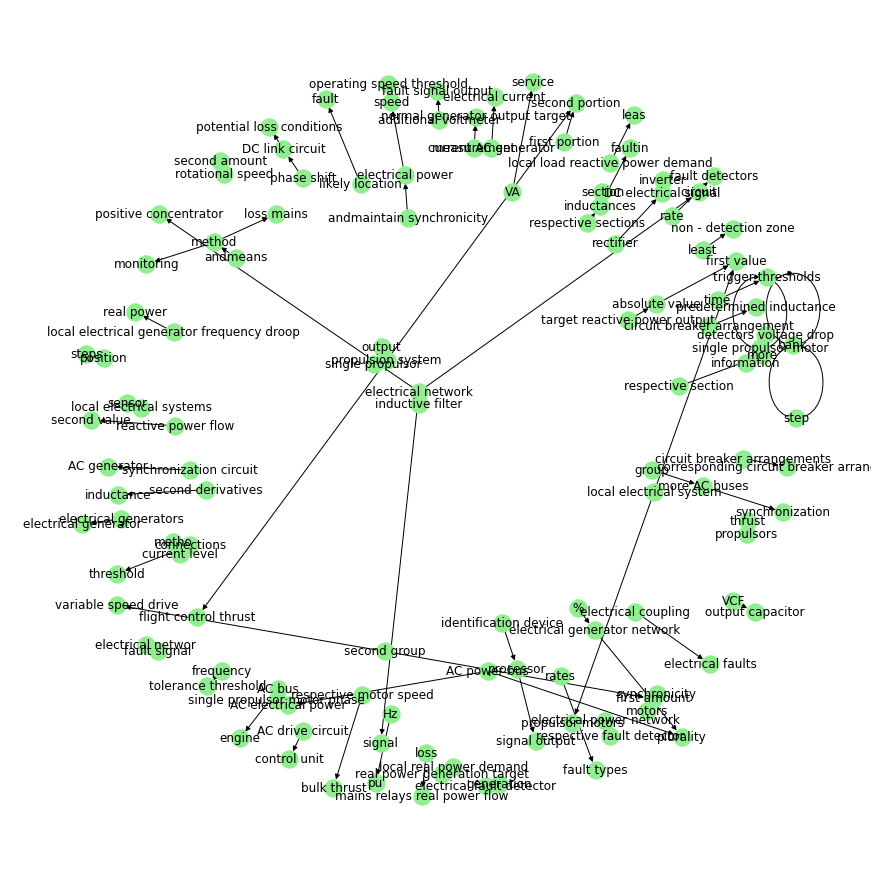

In [31]:
# Construction of Preliminary Knowledge Graph.

G=nx.from_pandas_edgelist(phrase_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='lightgreen', edge_cmap=plt.cm.Greens, pos = pos)
plt.show()